# 🛒 **O que afeta a experiência e satisfação do cliente no e-commerce brasileiro?**

### 🔍 Investigação dos principais padrões que influenciam:

* 🚚 **Atrasos de entrega**
* ⭐ **Baixa ou alta satisfação**
* 💲 **Diferenças de preço e frete**
* 📦 **Categorias de produtos problemáticas**
* ⏱️ **Variações no tempo de processamento e envio**


## ❓ **Perguntas Norteadoras**

1. **Quais características estão mais relacionadas a atrasos de entrega?**
2. **Existem categorias de produtos com maior frequência de problemas** (atrasos, preços altos, fretes elevados)?
3. **O dataset apresenta outliers? Como foram tratados?**
4. **Quais atributos mostraram maior correlação com preço, frete ou tempo de entrega?**
5. **A etapa de limpeza alterou o comportamento dos dados? Como e por quê?**
6. **O que influencia a satisfação do cliente com base nos atributos disponíveis?**

---

## 📊 **Dataset Utilizado**

🔗 *Brazilian E-Commerce Public Dataset by Olist*
[https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/data?select=olist_orders_dataset.csv](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/data?select=olist_orders_dataset.csv)

---



## 📈 **Esquema do Banco de Dados**

O projeto utilizará três tabelas disponibilizadas no conjunto de dados da Olist:

* **olist_order_items_dataset**
* **olist_orders_dataset**
* **olist_products_dataset**

Com base nessas três tabelas, é possível realizar uma análise detalhada e consistente.
Um ponto importante é que, como estratégia inicial, **iremos unificar esses três conjuntos de dados em um único DataFrame**.

Essa abordagem é justificada pelo próprio esquema divulgado no card do dataset, onde é apresentada uma relação clara entre as tabelas por meio de **chaves estrangeiras**, conforme ilustrado na imagem:

![Esquema do Banco](schema.png)

---

## 🔗 Relacionamento das Tabelas

As tabelas se conectam da seguinte forma:

**Orders ⟶ Items ⟶ Products**

* `orders` se relaciona com `order_items` por meio da chave `order_id`.
* `order_items` se relaciona com `products` por meio da chave `product_id`.

---

## 🎯 Benefício da Unificação

Unificar essas três tabelas em uma estrutura única facilita o processo de análise, permitindo:

* Trabalhar diretamente com um dataset consolidado
* Realizar EDA mais completa
* Criar métricas como receita, quantidade vendida, categorias, prazos etc.
* Reduzir a necessidade de múltiplos joins repetidos

Essa consolidação não perde informação e segue exatamente o modelo relacional do dataset.

---



### Instalando os pacotes

In [1]:
!pip install numpy pandas matplotlib scikit-learn seaborn

# Iniciando pacotes

In [2]:
import pandas as pd # Utilizado para manipulação e carregamento de datasets
import numpy as np # Trabalhar com algebra linear
import matplotlib.pyplot as plt # Plotagem de gráficos
import seaborn as sns # Utilizado em conjunto com matplotlib

from sklearn.preprocessing import MinMaxScaler , StandardScaler , LabelEncoder, OneHotEncoder # Normalização dos dados

from sklearn.feature_selection import VarianceThreshold

from typing import List , Dict , Tuple # Tipagem de funções 

# Merge dos dados

A primeira prática que vamos fazer é fazer o merge dos 3 conjuntos de dados para realizar uma analise mais solida os dados separados não possuem muita explicabilidade , então vamos utilizar a função merge do pandas e salvar os dados unidos 

In [3]:
# Vamos iniciar unindo o dataset olist_orders_dataset.csv e olist_order_items_dataset.csv

orders = pd.read_csv("data/input/olist_orders_dataset.csv")
items = pd.read_csv("data/input/olist_order_items_dataset.csv")

df = orders.merge(items, on="order_id", how="inner") # Utilizando Inner

In [4]:
# Agora vamos unir com products 
products = pd.read_csv("data/input/olist_products_dataset.csv")

df = df.merge(products, on="product_id", how="left") # Utilizando Left

In [5]:
df.to_csv("data/input/dataset_united.csv",index=True) # Salvando datset que será utilizado apra analise 

# Carregando dataset

In [6]:
# Agora podemos inicializar a analise carregando o dataset unido e vendo 
# as 5 primeiras instâncias 
df = pd.read_csv("data/input/dataset_united.csv")

cols_to_drop = [
    "Unnamed: 0",
    "order_id",
    "customer_id",
    "product_id",
    "seller_id",
    "order_item_id",
    "product_name_lenght",
    "product_description_lenght"
]

df = df.drop(columns=cols_to_drop)

df.head()

,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,price,freight_value,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,4.0,500.0,19.0,8.0,13.0
1,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-30 03:24:27,118.70,22.76,perfumaria,1.0,400.0,19.0,13.0,19.0
2,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-13 08:55:23,159.90,19.22,automotivo,1.0,420.0,24.0,19.0,21.0
3,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-23 19:45:59,45.00,27.20,pet_shop,3.0,450.0,30.0,10.0,20.0
4,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-19 20:31:37,19.90,8.72,papelaria,4.0,250.0,51.0,15.0,15.0


In [7]:
# Vendo também as ultimas 5 instâncias do dataset
df.tail()

,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,price,freight_value,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
112645,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,2018-02-12 13:10:37,174.90,20.10,bebes,4.0,4950.0,40.0,10.0,40.0
112646,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,2017-09-05 15:04:16,205.99,65.02,eletrodomesticos_2,2.0,13300.0,32.0,90.0,22.0
112647,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2018-01-12 21:36:21,179.99,40.59,informatica_acessorios,1.0,6550.0,20.0,20.0,20.0
112648,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2018-01-12 21:36:21,179.99,40.59,informatica_acessorios,1.0,6550.0,20.0,20.0,20.0
112649,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,2018-03-15 10:55:42,68.50,18.36,beleza_saude,1.0,150.0,16.0,7.0,15.0


Apenas com essa analise inicial podemos ver algumas coisas
- O dataset possui 112649 instâncias
- A colunas ID's que podem ser dropadas

# EDA inicial

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_status                   112650 non-null  object 
 1   order_purchase_timestamp       112650 non-null  object 
 2   order_approved_at              112635 non-null  object 
 3   order_delivered_carrier_date   111456 non-null  object 
 4   order_delivered_customer_date  110196 non-null  object 
 5   order_estimated_delivery_date  112650 non-null  object 
 6   shipping_limit_date            112650 non-null  object 
 7   price                          112650 non-null  float64
 8   freight_value                  112650 non-null  float64
 9   product_category_name          111047 non-null  object 
 10  product_photos_qty             111047 non-null  float64
 11  product_weight_g               112632 non-null  float64
 12  product_length_cm             

In [9]:
df.isnull().sum().sort_values(ascending=False)

order_delivered_customer_date    2454
product_category_name            1603
product_photos_qty               1603
order_delivered_carrier_date     1194
product_length_cm                  18
product_weight_g                   18
product_height_cm                  18
product_width_cm                   18
order_approved_at                  15
order_status                        0
order_purchase_timestamp            0
shipping_limit_date                 0
order_estimated_delivery_date       0
price                               0
freight_value                       0
dtype: int64

In [10]:
(df.isnull().mean() * 100).sort_values(ascending=False)

order_delivered_customer_date    2.178429
product_category_name            1.422992
product_photos_qty               1.422992
order_delivered_carrier_date     1.059920
product_length_cm                0.015979
product_weight_g                 0.015979
product_height_cm                0.015979
product_width_cm                 0.015979
order_approved_at                0.013316
order_status                     0.000000
order_purchase_timestamp         0.000000
shipping_limit_date              0.000000
order_estimated_delivery_date    0.000000
price                            0.000000
freight_value                    0.000000
dtype: float64

In [11]:
df.duplicated().sum()

np.int64(10424)

In [12]:
def collect_types_column(df: pd.DataFrame) -> Tuple[List[str], List[str]]:
    assert isinstance(df, pd.DataFrame), "O elemento de entrada não é um DataFrame"

    numeric_cols = df.select_dtypes(
        include=["int64", "float64", "int32", "float32"]
    ).columns.tolist()

    category_cols = df.select_dtypes(
        include=["object", "category", "string"]
    ).columns.tolist()

    return numeric_cols, category_cols

numerics , objects = collect_types_column(df) 

print("Colunas do tipo numericas")
print(numerics)
print(f"Quantidade {len(numerics)}")
print("------------------------------")
print("Colunas do tipo categorico")
print(objects)
print(f"Quantidade {len(objects)}")

Colunas do tipo numericas
['price', 'freight_value', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
Quantidade 7
------------------------------
Colunas do tipo categorico
['order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date', 'product_category_name']
Quantidade 8


In [13]:
print("Descrição das colunas numericas")
df[numerics].describe()

Descrição das colunas numericas


,price,freight_value,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112650.000000,112650.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000
mean,120.653739,19.990320,2.209713,2093.672047,30.153669,16.593766,22.996546
std,183.633928,15.806405,1.721438,3751.596884,16.153449,13.443483,11.707268
min,0.850000,0.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,39.900000,13.080000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,74.990000,16.260000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,134.900000,21.150000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,6735.000000,409.680000,20.000000,40425.000000,105.000000,105.000000,118.000000


1. price — OUTLIERS FORTES

    Máximo 6735 é 50x maior que o percentil 75 (134).

    A média é puxada para cima (120), bem maior que mediana (74).

    ➡ Outliers graves.

2. freight_value — OUTLIERS FORTES

    Máximo 409, enquanto 75% dos fretes custam até 21.

    Isso é 20x o frete típico.

    ➡ Outliers relevantes.

3. product_photos_qty — OUTLIERS

    A maioria tem 1–3 fotos.

    Máximo 20 fotos → incomum, mas não crítico.

    ➡ Outliers leves.

4. product_weight_g — OUTLIERS EXTREMOS

    Máximo 40425 g → 40 kg.

    75% estão abaixo de 1800 g (1.8 kg).

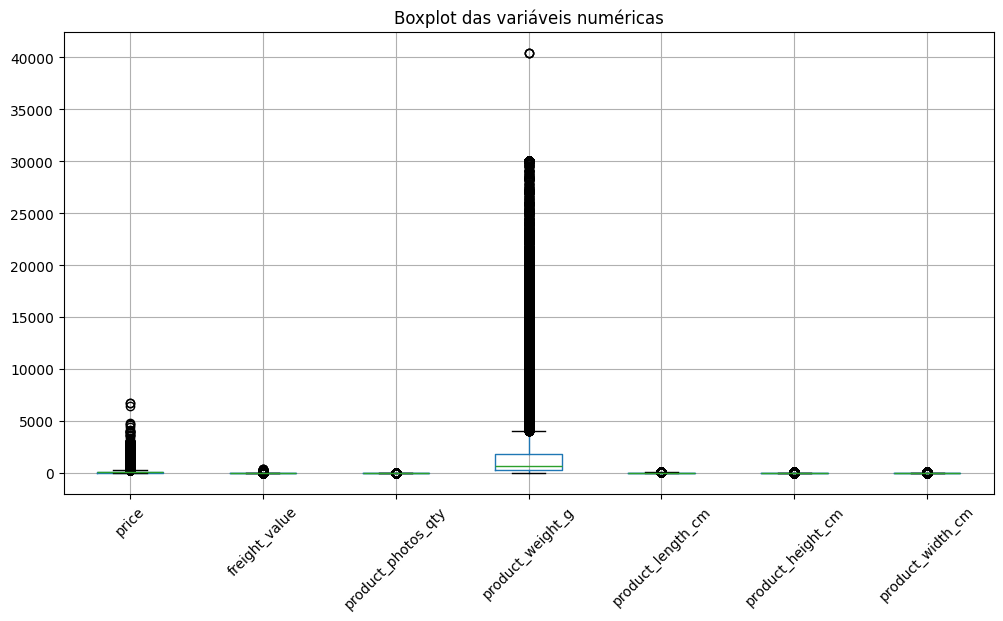

In [14]:
plt.figure(figsize=(12, 6))
df[numerics].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot das variáveis numéricas")
plt.show()


In [15]:
print("Descrição das colunas categoricas")
df[objects].describe()

Descrição das colunas categoricas


,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,product_category_name
count,112650,112650,112635,111456,110196,112650,112650,111047
unique,7,98112,90174,81017,95664,450,93318,73
top,delivered,2017-07-16 18:19:25,2018-02-24 03:20:27,2018-05-09 15:48:00,2017-07-31 18:03:02,2017-12-20 00:00:00,2018-03-01 02:50:48,cama_mesa_banho
freq,110197,21,23,48,21,604,21,11115


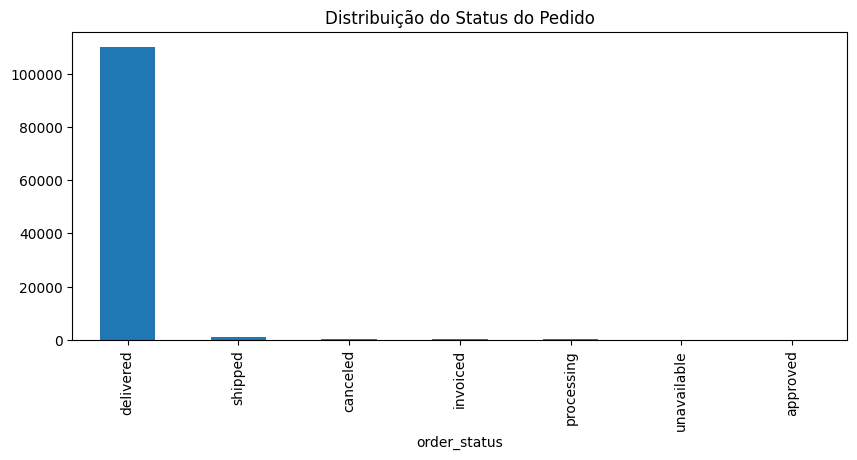

In [16]:
df['order_status'].value_counts().plot(kind='bar', figsize=(10, 4))
plt.title("Distribuição do Status do Pedido")
plt.show()


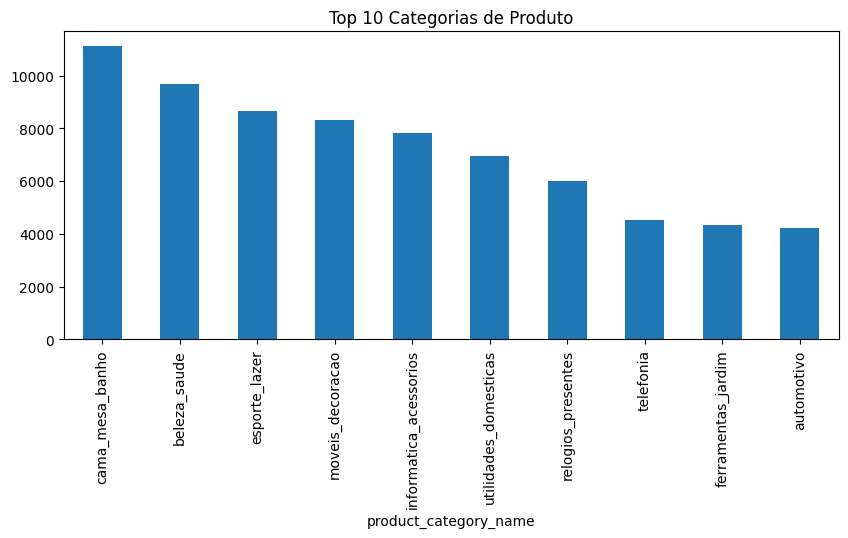

In [17]:
df['product_category_name'].value_counts().head(10).plot(kind='bar', figsize=(10, 4))
plt.title("Top 10 Categorias de Produto")
plt.show()


## Respondendo perguntas norteadoras (EDA inicial)

### Quais caracterísitcas mais se relacionam com atrasos de entrega ? 

In [18]:
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])
df["order_estimated_delivery_date"] = pd.to_datetime(df["order_estimated_delivery_date"])

# diferença em dias
df["delivery_delay_days"] = (
    df["order_delivered_customer_date"] - df["order_estimated_delivery_date"]
).dt.days

# coluna binária indicando atraso
df["is_late"] = df["delivery_delay_days"] > 0

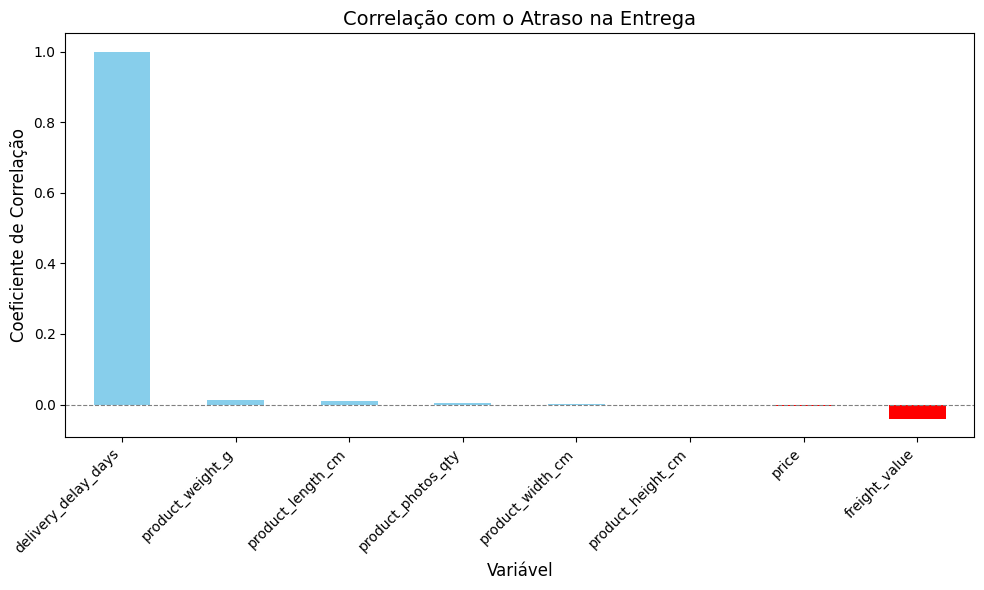

In [19]:
correlacoes = df[[
    "delivery_delay_days",
    "price",
    "freight_value",
    "product_photos_qty",
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm",
]].corr()

corr_delay = pd.DataFrame(correlacoes, index=correlacoes.keys())
corr_plot = corr_delay["delivery_delay_days"].sort_values(ascending=False)

plt.figure(figsize=(10, 6))

corr_plot.plot(
    kind='bar', 
    color=['red' if c < 0 else 'skyblue' for c in corr_plot]
) 

plt.title('Correlação com o Atraso na Entrega', fontsize=14)
plt.ylabel('Coeficiente de Correlação', fontsize=12)
plt.xlabel('Variável', fontsize=12)
plt.xticks(rotation=45, ha='right') 

plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')

plt.tight_layout()
plt.show()

#peso tende a ter correlação leve com atraso
#dimensões também
#preço normalmente não tem correlação significativa
#frete pode ter alguma relação com logística, mas tende a ser fraca

### Existem categorias de produtos com maior frequência de problemas?

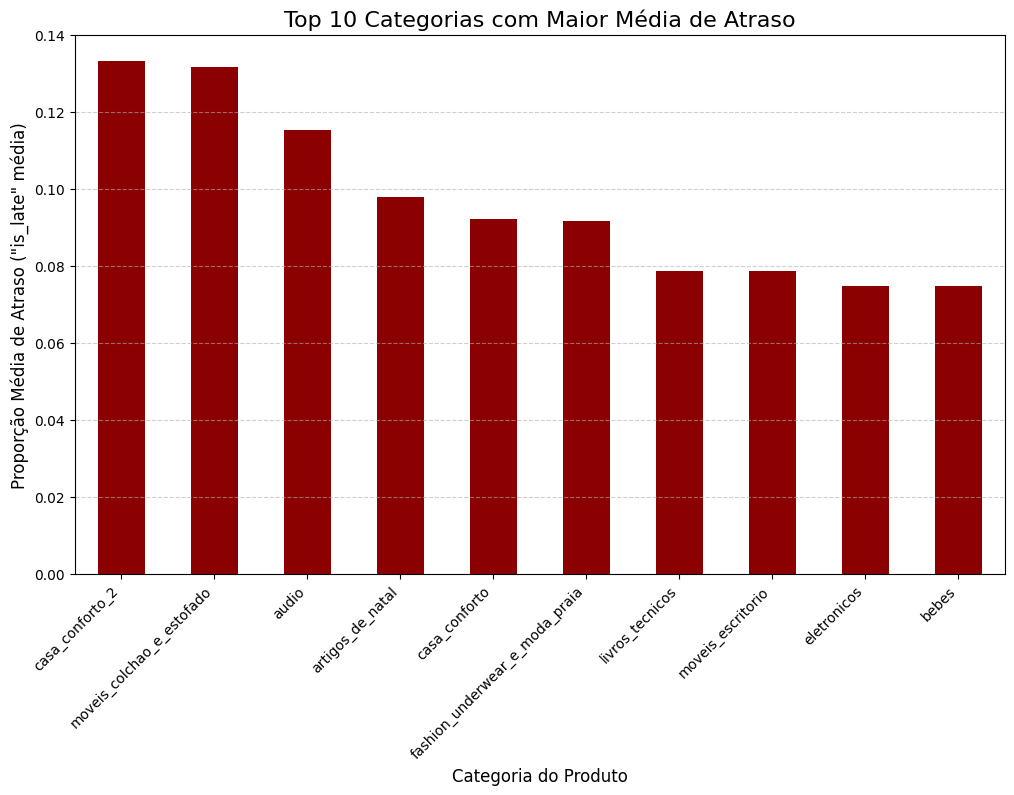

In [20]:
category_delay = (
    df.groupby("product_category_name")["is_late"]
    .mean()
    .sort_values(ascending=False)
)

# 1. Seleciona os 10 primeiros
top_10_delay = category_delay.head(10)

# 2. Cria a figura
plt.figure(figsize=(12, 7))

# 3. Usa o método .plot(kind='bar') diretamente na Series
top_10_delay.plot(kind='bar', color='darkred') 

# 4. Adicionar Título e Rótulos
plt.title('Top 10 Categorias com Maior Média de Atraso', fontsize=16)
plt.ylabel('Proporção Média de Atraso ("is_late" média)', fontsize=12)
plt.xlabel('Categoria do Produto', fontsize=12)

plt.xticks(rotation=45, ha='right') 

plt.grid(axis='y', linestyle='--', alpha=0.6)

### Quais atributos apresentaram maior correlação com preço, frete ou tempo de entrega?

In [21]:
df.corr(numeric_only=True)["price"].sort_values(ascending=False)

#forte correlação com frete_value
#correlação moderada com peso e tamanho

price                  1.000000
freight_value          0.414204
product_weight_g       0.338819
product_height_cm      0.223602
product_width_cm       0.172467
product_length_cm      0.145811
product_photos_qty     0.051848
is_late                0.021532
delivery_delay_days   -0.003596
Name: price, dtype: float64

In [22]:
df.corr(numeric_only=True)["freight_value"].sort_values(ascending=False)

#peso, volume (length × height × width) correlacionam bem
#frete aumenta com tamanho e peso

freight_value          1.000000
product_weight_g       0.610420
price                  0.414204
product_height_cm      0.391831
product_width_cm       0.323777
product_length_cm      0.309086
is_late                0.045162
product_photos_qty     0.022259
delivery_delay_days   -0.040242
Name: freight_value, dtype: float64

In [23]:
df.corr(numeric_only=True)["delivery_delay_days"].sort_values(ascending=False)

#leve correlação com dimensões e peso
#quase zero com preço

delivery_delay_days    1.000000
is_late                0.588837
product_weight_g       0.011553
product_length_cm      0.010328
product_photos_qty     0.005223
product_width_cm       0.001164
product_height_cm     -0.001462
price                 -0.003596
freight_value         -0.040242
Name: delivery_delay_days, dtype: float64

## Tratamento de dados

In [24]:
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

np.int64(0)

In [25]:
df = df.dropna().reset_index(drop=True)
df.isna().sum()

order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
delivery_delay_days              0
is_late                          0
dtype: int64

In [26]:
def winsorize_series_with_median(s, lower=0.25, upper=0.75):
    q1 = s.quantile(lower)
    q2 = s.quantile(upper)
    mediana = s.median()

    # substitui valores abaixo do limite inferior pela mediana
    s = s.copy()
    s[s < q1] = mediana
    s[s > q2] = mediana

    return s

df["price"] = winsorize_series_with_median(df["price"])
df["freight_value"] = winsorize_series_with_median(df["freight_value"])

In [27]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

cols_iqr = [
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm"
]

for col in cols_iqr:
    df = remove_outliers_iqr(df, col)

# EDA final

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76703 entries, 0 to 98586
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_status                   76703 non-null  object        
 1   order_purchase_timestamp       76703 non-null  object        
 2   order_approved_at              76703 non-null  object        
 3   order_delivered_carrier_date   76703 non-null  object        
 4   order_delivered_customer_date  76703 non-null  datetime64[ns]
 5   order_estimated_delivery_date  76703 non-null  datetime64[ns]
 6   shipping_limit_date            76703 non-null  object        
 7   price                          76703 non-null  float64       
 8   freight_value                  76703 non-null  float64       
 9   product_category_name          76703 non-null  object        
 10  product_photos_qty             76703 non-null  float64       
 11  product_weight_g    

In [29]:
df[numerics].describe()

,price,freight_value,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,76703.000000,76703.000000,76703.000000,76703.000000,76703.000000,76703.000000,76703.000000
mean,78.278744,16.453579,2.205872,769.262128,25.282362,12.634460,19.889418
std,18.752530,1.482277,1.714119,753.441701,9.788695,7.240182,7.834974
min,40.500000,13.160000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,71.900000,16.090000,1.000000,250.000000,17.000000,7.000000,14.000000
50%,78.000000,16.350000,1.000000,480.000000,21.000000,11.000000,18.000000
75%,78.000000,16.500000,3.000000,1050.000000,30.000000,16.000000,25.000000
max,139.000000,21.250000,17.000000,4050.000000,55.000000,34.000000,41.000000


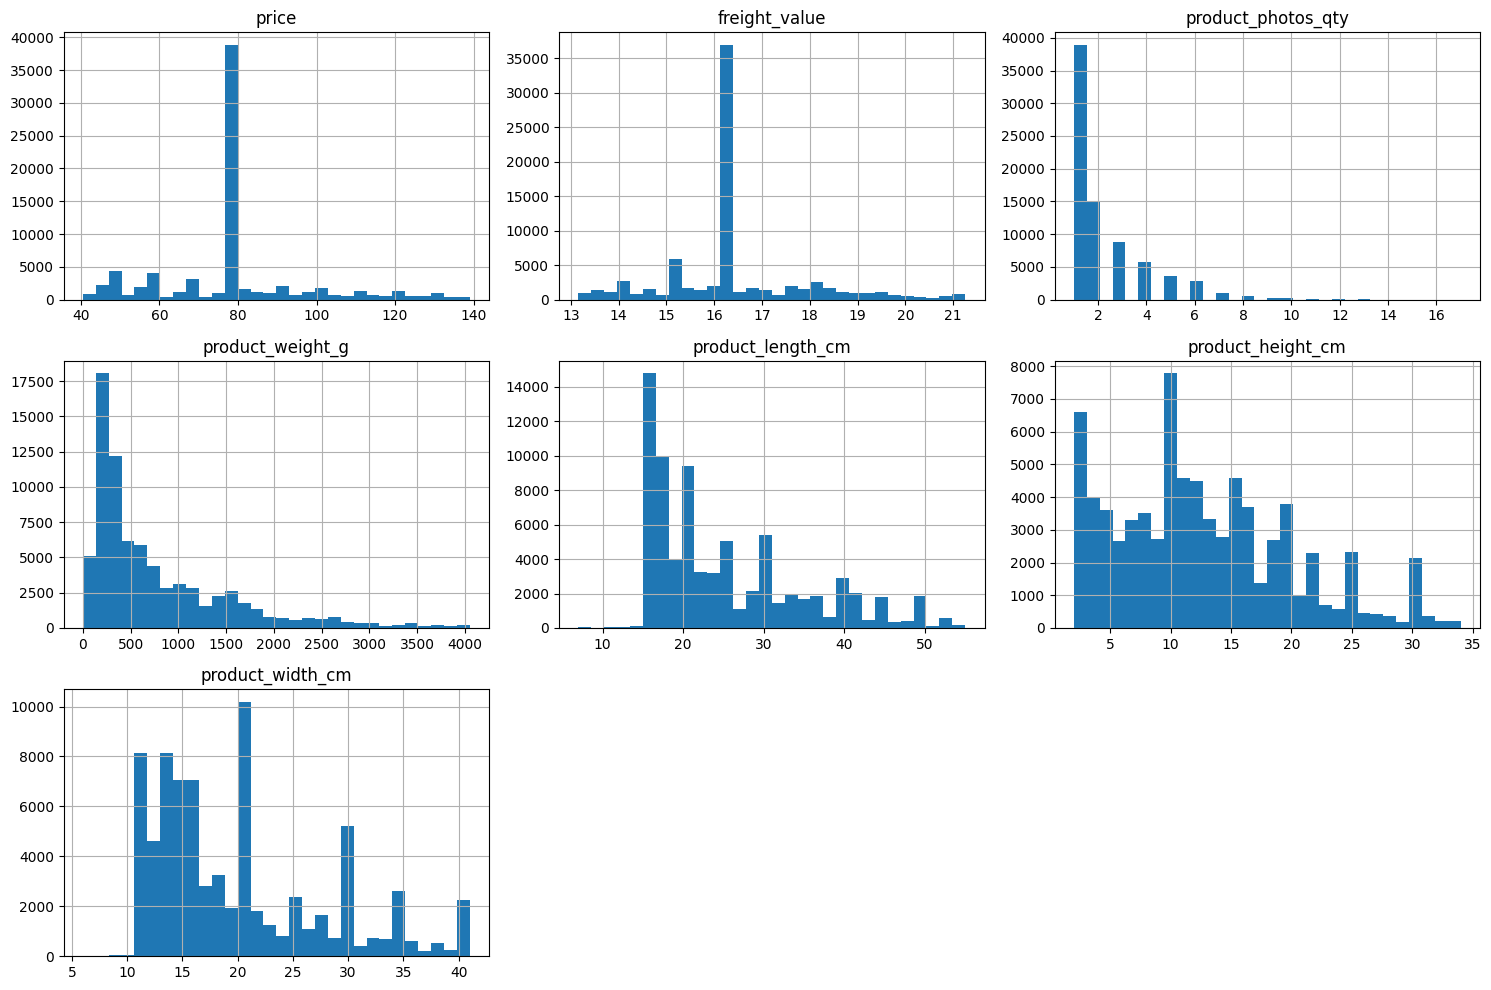

In [30]:
axes = df[numerics].hist(figsize=(15, 10), bins=30)
fig = axes.flatten()[0].figure
fig.tight_layout()
plt.show()

## Respondendo perguntas norteadoras (EDA final)

### Quais caracterísitcas mais se relacionam com atrasos de entrega ? 

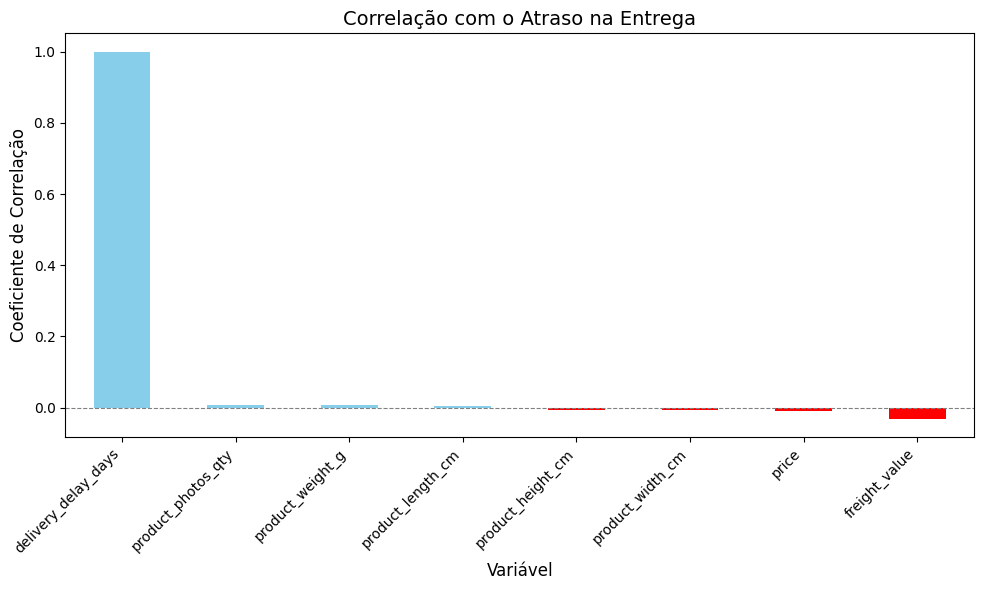

In [31]:
correlacoes = df[[
    "delivery_delay_days",
    "price",
    "freight_value",
    "product_photos_qty",
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm",
]].corr()

corr_delay = pd.DataFrame(correlacoes, index=correlacoes.keys())
corr_plot = corr_delay["delivery_delay_days"].sort_values(ascending=False)

plt.figure(figsize=(10, 6))

corr_plot.plot(
    kind='bar', 
    color=['red' if c < 0 else 'skyblue' for c in corr_plot]
) 

plt.title('Correlação com o Atraso na Entrega', fontsize=14)
plt.ylabel('Coeficiente de Correlação', fontsize=12)
plt.xlabel('Variável', fontsize=12)
plt.xticks(rotation=45, ha='right') 

plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')

plt.tight_layout()
plt.show()

### Existem categorias de produtos com maior frequência de problemas?

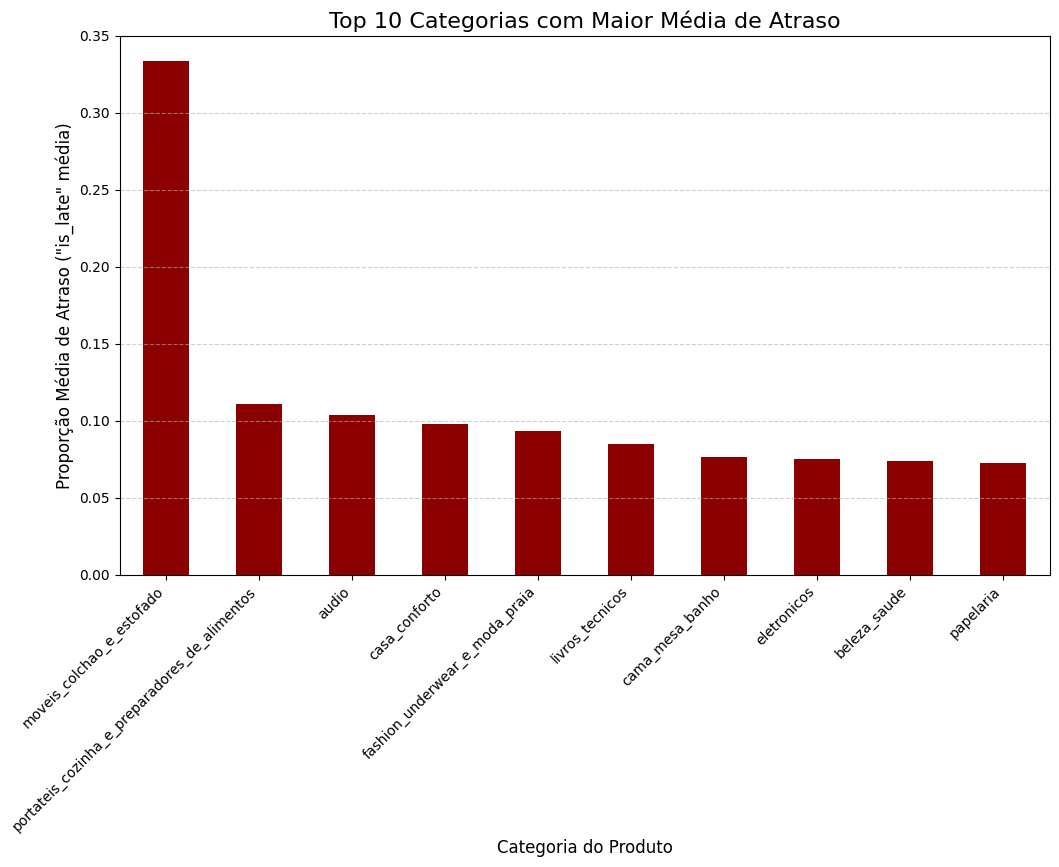

In [32]:
category_delay = (
    df.groupby("product_category_name")["is_late"]
    .mean()
    .sort_values(ascending=False)
)

# 1. Seleciona os 10 primeiros
top_10_delay = category_delay.head(10)

# 2. Cria a figura
plt.figure(figsize=(12, 7))

# 3. Usa o método .plot(kind='bar') diretamente na Series
top_10_delay.plot(kind='bar', color='darkred') 

# 4. Adicionar Título e Rótulos
plt.title('Top 10 Categorias com Maior Média de Atraso', fontsize=16)
plt.ylabel('Proporção Média de Atraso ("is_late" média)', fontsize=12)
plt.xlabel('Categoria do Produto', fontsize=12)

plt.xticks(rotation=45, ha='right') 

plt.grid(axis='y', linestyle='--', alpha=0.6)

In [33]:
df.corr(numeric_only=True)["price"].sort_values(ascending=False)

price                  1.000000
product_weight_g       0.143554
product_length_cm      0.093133
product_height_cm      0.087361
freight_value          0.037066
product_width_cm       0.032869
is_late                0.005096
delivery_delay_days   -0.009445
product_photos_qty    -0.049135
Name: price, dtype: float64

In [34]:
df.corr(numeric_only=True)["freight_value"].sort_values(ascending=False)

freight_value          1.000000
product_weight_g       0.096862
product_height_cm      0.059936
product_length_cm      0.053003
product_width_cm       0.042505
price                  0.037066
is_late                0.019899
product_photos_qty     0.009967
delivery_delay_days   -0.031060
Name: freight_value, dtype: float64

In [35]:
df.corr(numeric_only=True)["delivery_delay_days"].sort_values(ascending=False)

delivery_delay_days    1.000000
is_late                0.588804
product_photos_qty     0.007394
product_weight_g       0.006484
product_length_cm      0.005081
product_height_cm     -0.005191
product_width_cm      -0.005499
price                 -0.009445
freight_value         -0.031060
Name: delivery_delay_days, dtype: float64

A etapa de limpeza alterou de forma significativa o comportamento dos dados, o que é esperado em processos de pré-processamento. A remoção dos registros duplicados reduziu o conjunto de dados e eliminou repetições artificiais que poderiam criar concentrações falsas em determinadas variáveis. Com isso, as distribuições passaram a representar de forma mais fiel o comportamento real dos pedidos.

A exclusão de registros com valores nulos também impactou a estrutura do dataset. Como muitos desses valores incompletos estavam associados a colunas importantes, especialmente informações sobre entrega e características dos produtos, sua remoção reduziu a variabilidade dos dados e gerou um conjunto mais consistente. No entanto, essa etapa também pode introduzir um leve viés, já que pedidos com problemas ou inconsistências tendem a apresentar dados faltantes.

Por fim, o tratamento de outliers — feito substituindo valores extremos pela mediana — teve impacto direto na dispersão e na amplitude das variáveis numéricas. Ao suavizar valores muito altos ou muito baixos, especialmente em preço, frete e dimensões físicas dos produtos, o dataset se tornou mais estável e menos suscetível a distorções estatísticas. Isso melhora a qualidade das análises e das correlações, tornando-as mais representativas do comportamento típico dos dados.

In [36]:
df

,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,price,freight_value,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,delivery_delay_days,is_late
0,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-06 11:07:15,78.0,16.35,utilidades_domesticas,4.0,500.0,19.0,8.0,13.0,-8.0,False
1,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-30 03:24:27,118.7,16.35,perfumaria,1.0,400.0,19.0,13.0,19.0,-6.0,False
2,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-13 08:55:23,78.0,19.22,automotivo,1.0,420.0,24.0,19.0,21.0,-18.0,False
3,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-23 19:45:59,45.0,16.35,pet_shop,3.0,450.0,30.0,10.0,20.0,-13.0,False
4,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-19 20:31:37,78.0,16.35,papelaria,4.0,250.0,51.0,15.0,15.0,-10.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98579,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07,2017-10-10 20:07:14,78.0,16.35,brinquedos,3.0,750.0,26.0,15.0,26.0,-18.0,False
98580,delivered,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03-17,2017-02-03 00:30:03,78.0,19.43,beleza_saude,1.0,750.0,38.0,12.0,25.0,-38.0,False
98581,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22,2017-02-27 09:05:12,78.0,16.09,moveis_decoracao,2.0,2500.0,49.0,13.0,41.0,-16.0,False
98582,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,2017-03-15 09:54:05,72.0,16.35,beleza_saude,1.0,1175.0,22.0,13.0,18.0,-11.0,False


# Features Engineering

In [37]:
# Converter datas
date_cols = [
    "order_purchase_timestamp", "order_delivered_customer_date",
    "order_estimated_delivery_date"
]
df[date_cols] = df[date_cols].apply(pd.to_datetime)

# 1 — Tempo real de entrega
df["delivery_time"] = (
    df["order_delivered_customer_date"] - df["order_purchase_timestamp"]
).dt.days

# 2 — Atraso em relação ao prazo estimado
df["delivery_delay"] = (
    df["order_delivered_customer_date"] - df["order_estimated_delivery_date"]
).dt.days

# 3 — Volume do produto
df["product_volume"] = (
    df["product_length_cm"] *
    df["product_height_cm"] *
    df["product_width_cm"]
)

# 4 — Custo total
df["total_cost"] = df["price"] + df["freight_value"]

# 5 — Indicador de atraso
df["is_late"] = (df["delivery_delay"] > 0).astype(int)


# Codificação de dados Categóricos

In [38]:

# 1 — Label Encoding para order_status
le_status = LabelEncoder()
df["order_status_encoded"] = le_status.fit_transform(df["order_status"].astype(str))

# 2 — Label Encoding para categorias com muitos valores
le_cat = LabelEncoder()
df["product_category_encoded"] = le_cat.fit_transform(df["product_category_name"].astype(str))

# 3 — One-hot encoding (opcional)
df_ohe = pd.get_dummies(df, columns=["order_status"], prefix="status")


# Normalização e Padronização

In [39]:
numerical_cols = [
    "price", "freight_value", "product_photos_qty",
    "product_weight_g", "product_length_cm",
    "product_height_cm", "product_width_cm"
]


engineered_cols = [
    "delivery_time",
    "delivery_delay",
    "product_volume",
    "total_cost",
    "is_late"  
]


all_numeric_cols = numerical_cols + engineered_cols

mm_scaler = MinMaxScaler()
df[[col + "_mm" for col in all_numeric_cols]] = mm_scaler.fit_transform(df[all_numeric_cols])

z_scaler = StandardScaler()
df[[col + "_z" for col in all_numeric_cols]] = z_scaler.fit_transform(df[all_numeric_cols])

# Seleção de Atributos

### Correlação

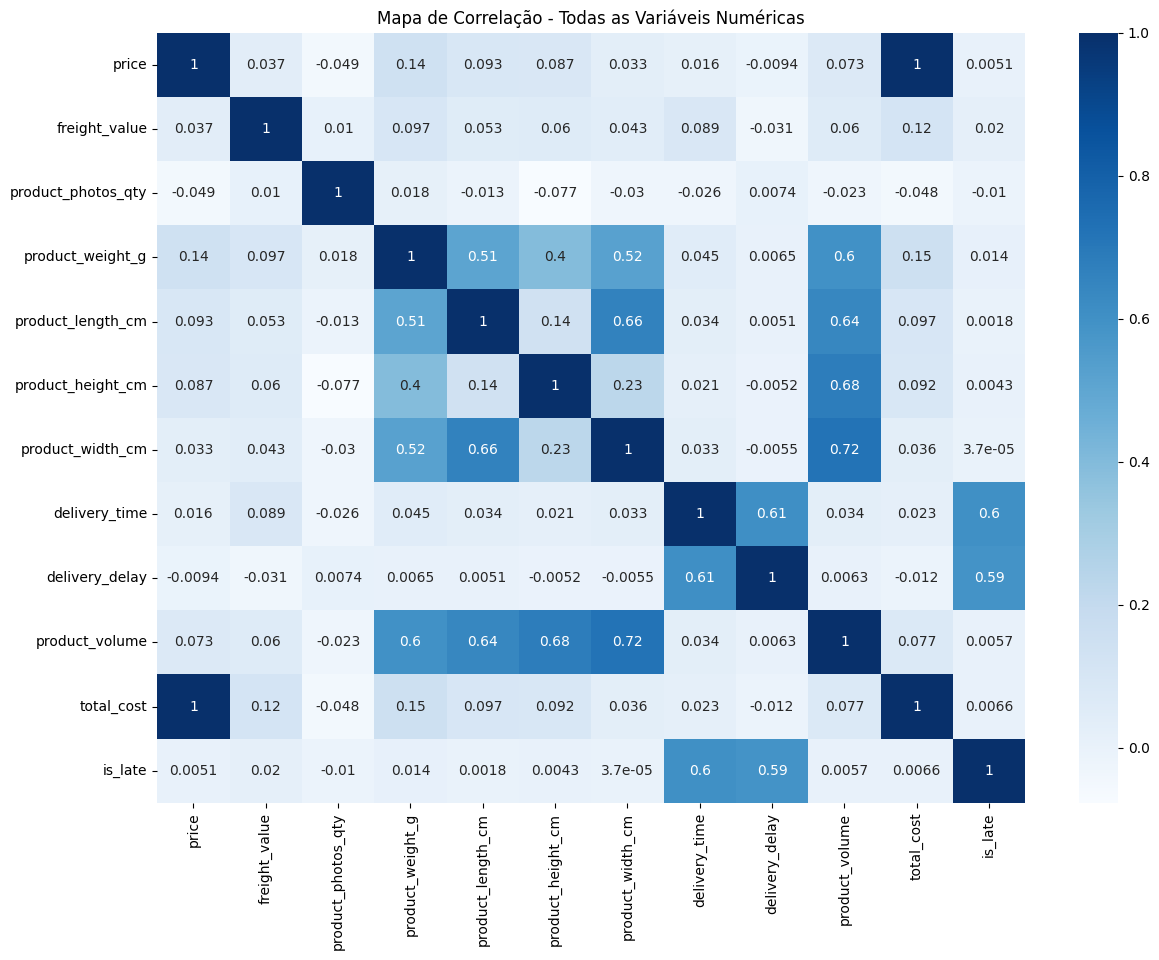

In [40]:
# Colunas numéricas originais
numerical_cols = [
    "price", "freight_value", "product_photos_qty",
    "product_weight_g", "product_length_cm",
    "product_height_cm", "product_width_cm"
]

# Colunas criadas no feature engineering
engineered_cols = [
    "delivery_time",
    "delivery_delay",
    "product_volume",
    "total_cost",
    "is_late"
]

# Junta todas as colunas numéricas
all_numeric_cols = numerical_cols + engineered_cols

plt.figure(figsize=(14, 10))
sns.heatmap(df[all_numeric_cols].corr(), annot=True, cmap="Blues")
plt.title("Mapa de Correlação - Todas as Variáveis Numéricas")
plt.show()


A limpeza e transformação dos dados permitiram identificar padrões importantes relacionados aos atrasos 
de entrega, custos e características dos produtos. Observou-se que itens maiores e mais pesados tendem a 
ter fretes maiores e apresentam maior risco de atraso. A criação de atributos como tempo de entrega, atraso 
em relação ao prazo estimado, volume do produto e custo total contribuiu para uma análise mais profunda, 
permitindo revelar relações que não eram explícitas nos atributos originais. Após o tratamento, o dataset 
se tornou mais estável, sem ruídos ou extremos que prejudicariam modelos analíticos, e está pronto para 
modelagem e predições mais avançadas.




In [41]:
df.to_csv("data/input/dataset_treaty.csv")